In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Download yesterday's data for calibrating model coefficients

In [2]:

BTCy = yf.download('BTC-USD', start='2023-06-15', end='2023-06-16',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTCy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-14 23:00:00+00:00,25031.283203,25031.283203,25031.283203,25031.283203,25031.283203,0
2023-06-14 23:01:00+00:00,25030.531250,25030.531250,25030.531250,25030.531250,25030.531250,1523712
2023-06-14 23:02:00+00:00,25023.560547,25023.560547,25023.560547,25023.560547,25023.560547,0
2023-06-14 23:03:00+00:00,25028.738281,25028.738281,25028.738281,25028.738281,25028.738281,0
2023-06-14 23:04:00+00:00,25026.839844,25026.839844,25026.839844,25026.839844,25026.839844,0
...,...,...,...,...,...,...
2023-06-15 22:56:00+00:00,25609.105469,25609.105469,25609.105469,25609.105469,25609.105469,0
2023-06-15 22:57:00+00:00,25621.910156,25621.910156,25621.910156,25621.910156,25621.910156,135168
2023-06-15 22:58:00+00:00,25615.371094,25615.371094,25615.371094,25615.371094,25615.371094,2439168


In [4]:
BTCy_drop = BTCy.iloc[:-10]

In [5]:
BTCy_drop

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-14 23:00:00+00:00,25031.283203,25031.283203,25031.283203,25031.283203,25031.283203,0
2023-06-14 23:01:00+00:00,25030.531250,25030.531250,25030.531250,25030.531250,25030.531250,1523712
2023-06-14 23:02:00+00:00,25023.560547,25023.560547,25023.560547,25023.560547,25023.560547,0
2023-06-14 23:03:00+00:00,25028.738281,25028.738281,25028.738281,25028.738281,25028.738281,0
2023-06-14 23:04:00+00:00,25026.839844,25026.839844,25026.839844,25026.839844,25026.839844,0
...,...,...,...,...,...,...
2023-06-15 22:46:00+00:00,25632.113281,25632.113281,25632.113281,25632.113281,25632.113281,0
2023-06-15 22:47:00+00:00,25618.582031,25618.582031,25618.582031,25618.582031,25618.582031,0
2023-06-15 22:48:00+00:00,25610.396484,25610.396484,25610.396484,25610.396484,25610.396484,0


In [6]:
ETHy = yf.download('ETH-USD', start='2023-06-15', end='2023-06-16',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [7]:
ETHy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-14 23:00:00+00:00,1649.549438,1649.549438,1649.549438,1649.549438,1649.549438,0
2023-06-14 23:01:00+00:00,1649.872070,1649.872070,1649.872070,1649.872070,1649.872070,8147968
2023-06-14 23:02:00+00:00,1649.675903,1649.675903,1649.675903,1649.675903,1649.675903,0
2023-06-14 23:03:00+00:00,1650.152222,1650.152222,1650.152222,1650.152222,1650.152222,0
2023-06-14 23:04:00+00:00,1649.916748,1649.916748,1649.916748,1649.916748,1649.916748,2574336
...,...,...,...,...,...,...
2023-06-15 22:56:00+00:00,1664.185547,1664.185547,1664.185547,1664.185547,1664.185547,0
2023-06-15 22:57:00+00:00,1664.614136,1664.614136,1664.614136,1664.614136,1664.614136,415744
2023-06-15 22:58:00+00:00,1664.699219,1664.699219,1664.699219,1664.699219,1664.699219,2518528


In [8]:
ETHy_drop = ETHy.iloc[:-9]
ETHy_drop

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-14 23:00:00+00:00,1649.549438,1649.549438,1649.549438,1649.549438,1649.549438,0
2023-06-14 23:01:00+00:00,1649.872070,1649.872070,1649.872070,1649.872070,1649.872070,8147968
2023-06-14 23:02:00+00:00,1649.675903,1649.675903,1649.675903,1649.675903,1649.675903,0
2023-06-14 23:03:00+00:00,1650.152222,1650.152222,1650.152222,1650.152222,1650.152222,0
2023-06-14 23:04:00+00:00,1649.916748,1649.916748,1649.916748,1649.916748,1649.916748,2574336
...,...,...,...,...,...,...
2023-06-15 22:47:00+00:00,1666.106079,1666.106079,1666.106079,1666.106079,1666.106079,257024
2023-06-15 22:48:00+00:00,1665.437622,1665.437622,1665.437622,1665.437622,1665.437622,808960
2023-06-15 22:49:00+00:00,1665.555176,1665.555176,1665.555176,1665.555176,1665.555176,0


In [9]:
lr1 = np.log(BTCy_drop['Adj Close'] / BTCy_drop['Adj Close'].shift(1))
lr2 = np.log(ETHy['Adj Close'] / ETHy['Adj Close'].shift(1))




z_0 = 0.00

#Risk Aversion coefficient
gamma = 0.5


# Spead of mean reversion
delta = 0.8


#Total time in days
T = 1


In [34]:
mu_1 = lr1.mean() * 390
mu_1

0.006308204693462284

In [35]:
mu_2 = lr2.mean() * 390
mu_2

0.00244979281400522

In [36]:
sigma_1 = lr1.std() * np.sqrt(390)
sigma_1

0.00932258945686117

In [37]:
sigma_2 = lr2.std() * np.sqrt(390)
sigma_2

0.009553513729206473

In [14]:
#Total observations/ time interval
M = len(BTCy_drop)
M

1420

In [15]:

result = linregress(np.log(BTCy_drop['Adj Close']), np.log(ETHy_drop['Adj Close']))

#Cointegration Coefficient parameter
beta = result.slope
beta

0.7694190462155818

In [16]:
#Correlation Coefficient
rho = lr1.corr(lr2)
rho

0.8781346827172013

### Download today's data for feedback control

In [17]:
BTC = yf.download('BTC-USD', start='2023-06-16', end='2023-06-17',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [18]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-15 23:00:00+00:00,25606.259766,25606.259766,25606.259766,25606.259766,25606.259766,0
2023-06-15 23:01:00+00:00,25612.388672,25612.388672,25612.388672,25612.388672,25612.388672,0
2023-06-15 23:02:00+00:00,25611.996094,25611.996094,25611.996094,25611.996094,25611.996094,0
2023-06-15 23:03:00+00:00,25602.949219,25602.949219,25602.949219,25602.949219,25602.949219,0
2023-06-15 23:04:00+00:00,25590.523438,25590.523438,25590.523438,25590.523438,25590.523438,1282048
...,...,...,...,...,...,...
2023-06-16 22:56:00+00:00,26350.591797,26350.591797,26350.591797,26350.591797,26350.591797,0
2023-06-16 22:57:00+00:00,26357.273438,26357.273438,26357.273438,26357.273438,26357.273438,0
2023-06-16 22:58:00+00:00,26355.962891,26355.962891,26355.962891,26355.962891,26355.962891,0


In [19]:
ETH = yf.download('ETH-USD', start='2023-06-16', end='2023-06-17',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [20]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-15 23:00:00+00:00,1664.412476,1664.412476,1664.412476,1664.412476,1664.412476,0
2023-06-15 23:01:00+00:00,1664.467163,1664.467163,1664.467163,1664.467163,1664.467163,0
2023-06-15 23:02:00+00:00,1664.288574,1664.288574,1664.288574,1664.288574,1664.288574,0
2023-06-15 23:03:00+00:00,1664.378296,1664.378296,1664.378296,1664.378296,1664.378296,0
2023-06-15 23:04:00+00:00,1664.066895,1664.066895,1664.066895,1664.066895,1664.066895,0
...,...,...,...,...,...,...
2023-06-16 22:56:00+00:00,1718.241821,1718.241821,1718.241821,1718.241821,1718.241821,526336
2023-06-16 22:57:00+00:00,1718.630371,1718.630371,1718.630371,1718.630371,1718.630371,0
2023-06-16 22:58:00+00:00,1718.666504,1718.666504,1718.666504,1718.666504,1718.666504,0


In [21]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [22]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

### Simulate co-integrated factor

In [23]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

In [63]:
S1[0] 

array([25606.25976562])

In [64]:
S2[0]

array([1664.41247559])

Text(0.5, 1.0, 'Price')

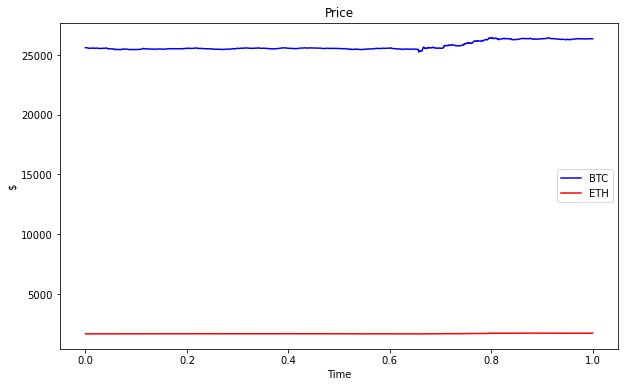

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Price')

Text(0.5, 1.0, 'z')

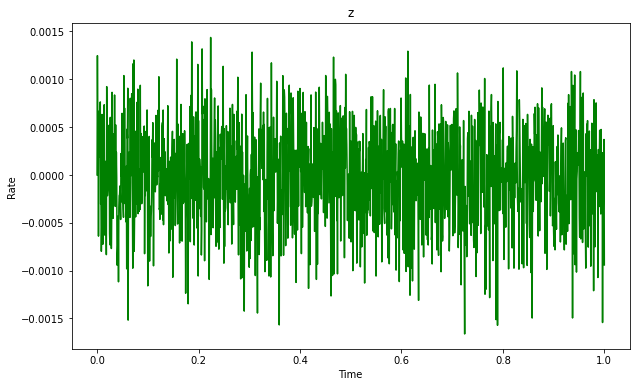

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

### Trading Strategies

In [26]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

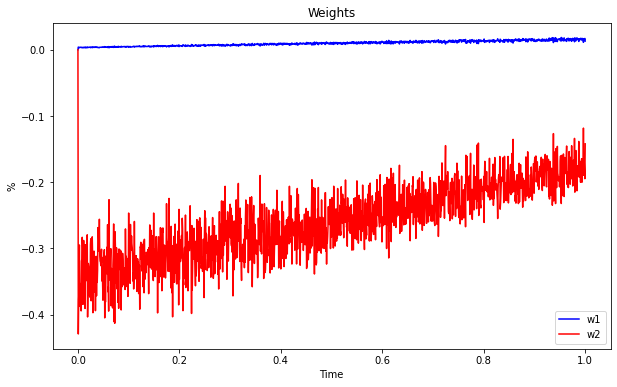

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

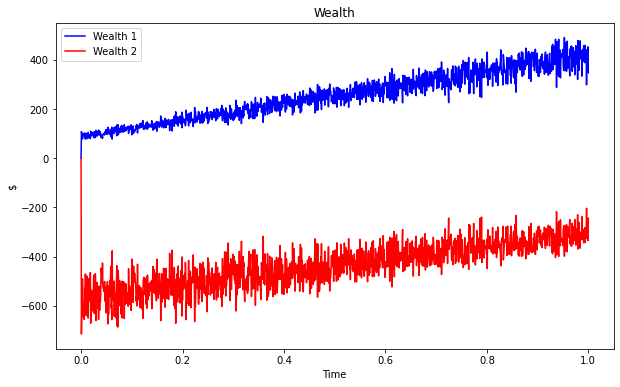

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [29]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

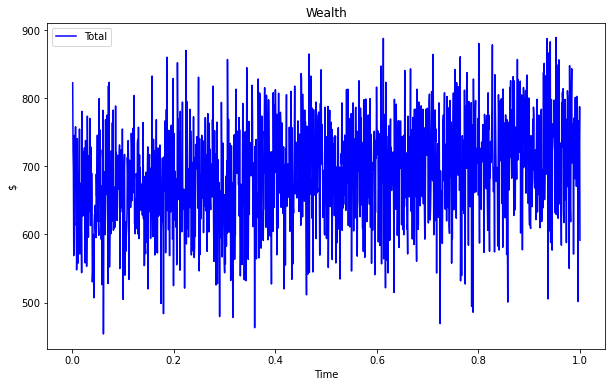

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

### Return

In [31]:
Wealth[1]   # Inital Wealth

array([822.58953494])

In [32]:
Wealth[-1]  # Ending Wealth

array([591.57636664])

In [33]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

-0.2808365028753879

In [38]:
# This provides the static weight for Pi_1 of the static control pair
Pi_1.mean()

0.009820185939492186

In [39]:
# This provides the static weight for Pi_2 of the static control pair
Pi_2.mean()

-0.2602750136311294

Text(0.5, 1.0, 'Comparison')

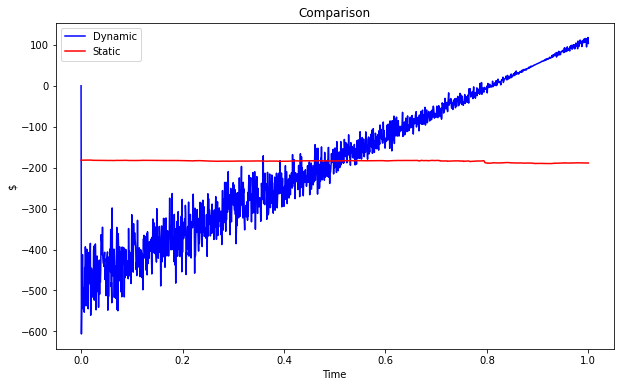

In [40]:
# Plot the dynamic control and static control for the wealth process for a comparison

plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic') #Gives wealth process with dynamic control pair
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static') #Gives wealth process with static control pair
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison') 

In [ ]:
#Simulation using asset pairs and simulated prices

In [55]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2)))

Text(0.5, 1.0, 'Simulated Asset Price')

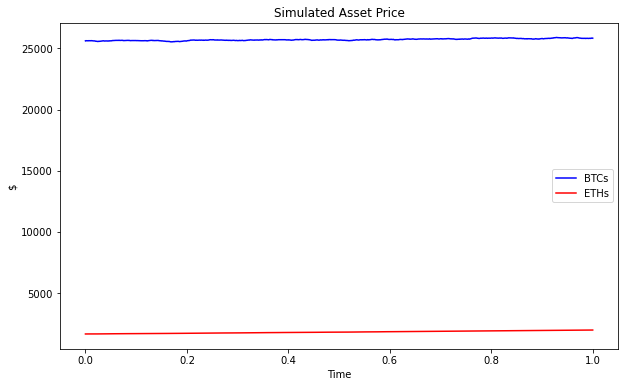

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTCs')
plt.plot(tt, S2, 'r', lw=1.5, label='ETHs')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulated Asset Price')

Text(0.5, 1.0, 'z')

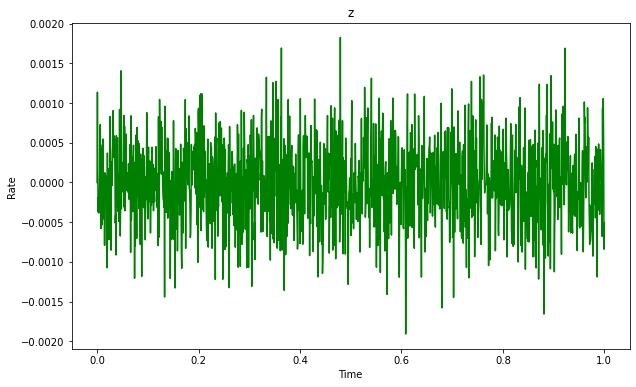

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [58]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

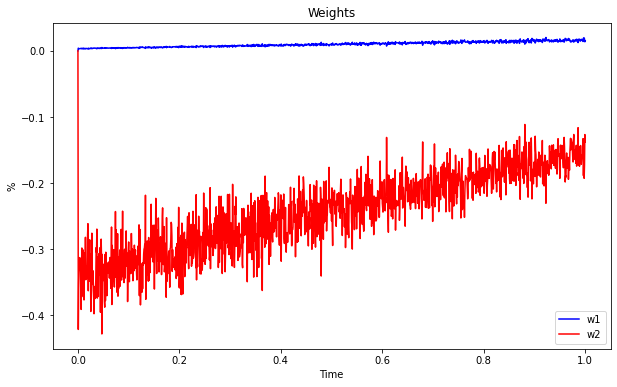

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth/')

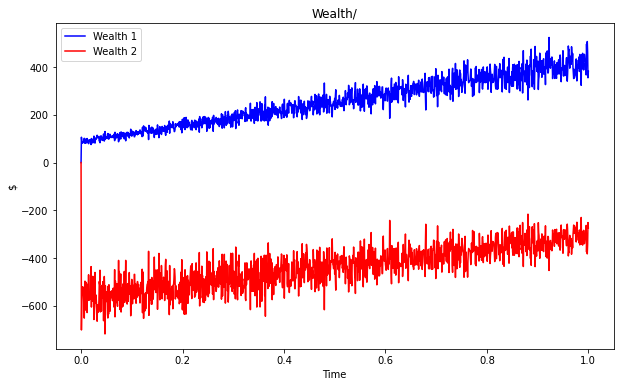

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth/')

In [61]:
Pi_1sim.mean()

0.009909617972668223

In [62]:
Pi_2sim.mean()

-0.2434918432374904

Text(0.5, 1.0, 'Simulated Comparison')

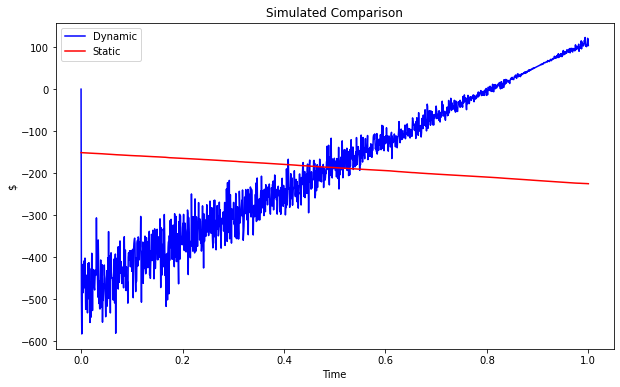

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulated Comparison')